<a href="https://colab.research.google.com/github/BralexMtz/First-AI-Algorithms/blob/main/Lineal_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import torch.nn as nn # de redes neuronales para regresion lineal
import torch.optim as optim # para optimizar los gradientes y hacer un backpropagation
#Para graficar
import matplotlib.pyplot as plt

# Regresion Lineal
---

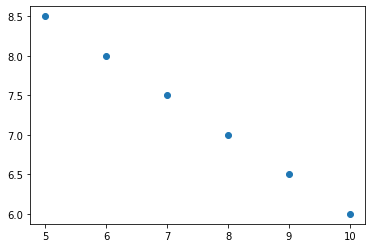

In [2]:
car_prices = [5,6,7,8,9,10]
units_sold = [8.5,8,7.5,7.0,6.5,6.0]
plt.scatter(car_prices, units_sold)

In [4]:
# de python a numpy
prices_array=np.array(car_prices).reshape(-1,1)
units_array=np.array(units_sold).reshape(-1,1)

prices_array

array([[ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [5]:
# de numpy a torch
# activamos el tensor con gradientes activados 
# para poder hacer el backpropagation en la construccion del modelo
prices = torch.from_numpy(prices_array).float().requires_grad_(True)
# Aqui no activamos gradientes porque
# es nuestro target, lo que tratamos de explicar.
units = torch.from_numpy(units_array).float()

prices, prices.shape

(tensor([[ 5.],
         [ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.]], requires_grad=True), torch.Size([6, 1]))

0.13928104937076569


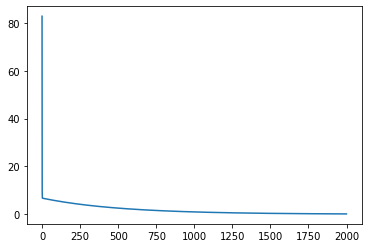

In [12]:
# Creamos un modelo lineal
model = nn.Linear(1,1)

# media del cuadrado de los valores
loss_function = nn.MSELoss()

# Stocastic Gradient Decent
optimizer = optim.SGD(model.parameters(), lr=0.01)
#                     ^                      ^
# los pesos dados a partir del modelo        LearningRate es el grado de cambio en cada iteración

# Ahora podemos hacer el entrenamiento y graficaremos las iteraciones
losses=[]
iterations = 2000
for i in range(iterations):
  #predecimos, ejecutar el forward pass con el modelo 
  pred = model(prices)
  # la perdida o diferencia a partir de la prediccion y el target
  loss = loss_function(pred, units)
  # agregar la perdida al arreglo para graficar
  losses.append(loss.data)

  # reiniciamos los gradientes para que no se acumulen en cada iteracion
  optimizer.zero_grad()
  # Para entrenar con backward, corregir
  loss.backward()
  # nos movemos un poco en dirección del meaning
  optimizer.step()


print(float(loss))
# graficamos las iteraciones con los losses
plt.plot(range(iterations),losses)


Aqui podemos ver que la perdida va disminuyendo en cada iteración de tal forma que cada vez nos acercamos más y más a los valores reales.


**En este punto el modelo ya se ha entrenado.**

Así que ya podemos predecir.

In [13]:
x = torch.Tensor([[4.0]])
p = model(x)
p

tensor([[8.1729]], grad_fn=<AddmmBackward>)